In [182]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [183]:
import xgboost as xgb

In [184]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np
from scipy.stats import randint

In [191]:
df_train = pd.read_pickle("../data/pkl/ADV_OHE_TEAM_ALL")

In [192]:
df_train.columns

Index(['GAME_ID', 'TEAM_ID_h', 'TEAM_NAME_h', 'TEAM_ABBREVIATION_h',
       'OFF_RATING_h', 'DEF_RATING_h', 'NET_RATING_h', 'AST_PCT_h',
       'AST_TOV_h', 'OREB_PCT_h',
       ...
       'OKC_a', 'ORL_a', 'PHI_a', 'PHX_a', 'POR_a', 'SAC_a', 'SAS_a', 'TOR_a',
       'UTA_a', 'WAS_a'],
      dtype='object', length=175)

In [193]:
df_target = df_train['PLUS_MINUS']

In [199]:
list(df_train.columns)

['GAME_ID',
 'TEAM_ID_h',
 'TEAM_NAME_h',
 'TEAM_ABBREVIATION_h',
 'OFF_RATING_h',
 'DEF_RATING_h',
 'NET_RATING_h',
 'AST_PCT_h',
 'AST_TOV_h',
 'OREB_PCT_h',
 'DREB_PCT_h',
 'REB_PCT_h',
 'TM_TOV_PCT_h',
 'EFG_PCT_h',
 'TS_PCT_h',
 'PACE_h',
 'POSS_h',
 'GAME_DATE',
 'HOME_TEAM_h',
 'PLUS_MINUS',
 'OFF_RATING_Roll_mean_h',
 'DEF_RATING_Roll_mean_h',
 'NET_RATING_Roll_mean_h',
 'AST_PCT_Roll_mean_h',
 'AST_TOV_Roll_mean_h',
 'OREB_PCT_Roll_mean_h',
 'DREB_PCT_Roll_mean_h',
 'REB_PCT_Roll_mean_h',
 'TM_TOV_PCT_Roll_mean_h',
 'EFG_PCT_Roll_mean_h',
 'TS_PCT_Roll_mean_h',
 'PACE_Roll_mean_h',
 'POSS_Roll_mean_h',
 'OFF_RATING_Roll_median_x_h',
 'DEF_RATING_Roll_median_x_h',
 'NET_RATING_Roll_median_x_h',
 'AST_PCT_Roll_median_x_h',
 'AST_TOV_Roll_median_x_h',
 'OREB_PCT_Roll_median_x_h',
 'DREB_PCT_Roll_median_x_h',
 'REB_PCT_Roll_median_x_h',
 'TM_TOV_PCT_Roll_median_x_h',
 'EFG_PCT_Roll_median_x_h',
 'TS_PCT_Roll_median_x_h',
 'PACE_Roll_median_x_h',
 'POSS_Roll_median_x_h',
 'OFF_RATI

In [194]:
columns_drop = ['PLUS_MINUS', 'OFF_RATING_h', 'GAME_ID', 'TEAM_ID_h', 'TEAM_NAME_h', 'TEAM_ABBREVIATION_h',
 'DEF_RATING_h',
 'NET_RATING_h',
 'AST_PCT_h',
 'AST_TOV_h',
 'OREB_PCT_h',
 'DREB_PCT_h',
 'REB_PCT_h',
 'TM_TOV_PCT_h',
 'EFG_PCT_h',
 'TS_PCT_h',
 'PACE_h',
 'POSS_h','OFF_RATING_a',
 'DEF_RATING_a',
 'NET_RATING_a',
 'AST_PCT_a',
 'AST_TOV_a',
 'OREB_PCT_a',
 'DREB_PCT_a',
 'REB_PCT_a',
 'TM_TOV_PCT_a',
 'EFG_PCT_a',
 'TS_PCT_a',
 'PACE_a',
 'POSS_a', 'AST_PCT_Roll_std_h',
 'AST_PCT_Roll_median_a',
 'REB_PCT_Roll_std_h',
 'TM_TOV_PCT_Roll_std_h',
 'AST_PCT_Roll_std_a',
 'OREB_PCT_Roll_median_h',
 'OREB_PCT_Roll_std_a',
 'EFG_PCT_Roll_std_h',
 'POSS_Roll_std_a',
 'AST_TOV_Roll_median_h',
 'OREB_PCT_Roll_median_a',
 'AST_PCT_Roll_mean_a',
 'OREB_PCT_Roll_std_h',
 'AST_TOV_Roll_std_a',
 'PACE_Roll_std_h',
 'DREB_PCT_Roll_std_h',
 'REB_PCT_Roll_median_h',
 'PACE_Roll_median_h',
 'TS_PCT_Roll_mean_h',
 'REB_PCT_Roll_mean_h',
 'POSS_Roll_mean_h',
 'AST_PCT_Roll_median_h',
 'EFG_PCT_Roll_median_a',
 'DREB_PCT_Roll_median_h',
 'EFG_PCT_Roll_mean_h',
 'PACE_Roll_mean_h',
 'TM_TOV_PCT_Roll_mean_h',
 'DREB_PCT_Roll_mean_h',
 'OREB_PCT_Roll_mean_h',
 'AST_TOV_Roll_mean_h',
 'AST_PCT_Roll_mean_h',
 'DEF_RATING_Roll_mean_h',
 'OFF_RATING_Roll_mean_h']

In [195]:
df_train = df_train.drop(columns_drop, axis=1)

KeyError: "['AST_PCT_Roll_std_h', 'AST_PCT_Roll_median_a', 'REB_PCT_Roll_std_h', 'TM_TOV_PCT_Roll_std_h', 'AST_PCT_Roll_std_a', 'OREB_PCT_Roll_median_h', 'OREB_PCT_Roll_std_a', 'EFG_PCT_Roll_std_h', 'POSS_Roll_std_a', 'AST_TOV_Roll_median_h', 'OREB_PCT_Roll_median_a', 'OREB_PCT_Roll_std_h', 'AST_TOV_Roll_std_a', 'PACE_Roll_std_h', 'DREB_PCT_Roll_std_h', 'REB_PCT_Roll_median_h', 'PACE_Roll_median_h', 'AST_PCT_Roll_median_h', 'EFG_PCT_Roll_median_a', 'DREB_PCT_Roll_median_h'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, random_state=0, test_size=0.3)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = scaler.transform(np.array(y_test).reshape(-1, 1))

In [25]:
y_train

array([[0.58156028],
       [0.36879433],
       [0.67375887],
       ...,
       [0.59574468],
       [0.34042553],
       [0.59574468]])

In [18]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

In [19]:
xg_model = XGBRegressor(subsample= 0.39, reg_lambda= 0.028299,reg_alpha=0.033299, objective= 'reg:pseudohubererror', n_estimators= 650, max_depth=32, 
                        learning_rate = 0.021399, huber_slope=4.56, n_jobs=-1)

In [20]:
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, huber_slope=4.56,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.021399, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=32,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=650, n_jobs=-1,
             num_parallel_tree=None, objective='reg:pseudohubererror', ...)

In [21]:
cross_val_score(xg_model, X_train, y_train, cv=5)

array([0.45810264, 0.50933166, 0.47499797, 0.4490659 , 0.51383483])

In [38]:
r2_score(y_test, xg_model.predict(X_test))

0.4751805564300373

In [35]:
y_test.ravel()

array([0.53191489, 0.53900709, 0.39716312, ..., 0.43971631, 0.53900709,
       0.53191489])

In [28]:
rmse = mean_squared_error(y_test, xg_model.predict(X_test), squared=False)
rmse

0.07359916379221514

In [29]:
import seaborn as sns

<Axes: ylabel='Count'>

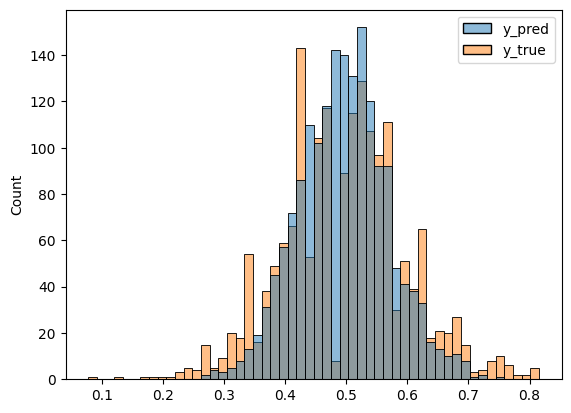

In [36]:
sns.histplot(pd.DataFrame({'y_pred':xg_model.predict(X_test), 'y_true':y_test.ravel()}))

In [205]:
df_pinnacle = pd.read_csv('../data/csv/pinnacle_sportsbook.csv')
df_teamnames = pd.read_pickle('../data/pkl/raw_games_5yrs.pkl')

In [133]:
df_pinnacle_spread = df_pinnacle[['participant id', 'description', 'decimal odds', 'american odds', 'spread / total']]

In [134]:
df_pinnacle_names = df_pinnacle[['participants.1.participant id', 'participants.1.source.nickname',
       'participants.1.source.short name', 'participants.2.participant id',
       'participants.2.source.nickname', 'participants.2.source.short name']]

In [135]:
df_pinnacle_names['p1_full'] = df_pinnacle_names['participants.1.source.short name'] + ' ' + df_pinnacle_names['participants.1.source.nickname']
df_pinnacle_names['p2_full'] = df_pinnacle_names['participants.2.source.short name'] + ' ' + df_pinnacle_names['participants.2.source.nickname']
df_pinnacle_names['p2_full'] = df_pinnacle_names['p2_full'].replace({'L.A. Clippers L.A. Clippers': 'LA Clippers', 'L.A. Lakers L.A. Lakers': 'Los Angeles Lakers'})
df_pinnacle_names['p1_full'] = df_pinnacle_names['p1_full'].replace({'L.A. Clippers L.A. Clippers': 'LA Clippers', 'L.A. Lakers L.A. Lakers': 'Los Angeles Lakers'})
df_pinnacle_names = df_pinnacle_names[df_pinnacle_names['p1_full'].isin(pd.unique(df_teamnames['TEAM_NAME']))]
df_pinnacle_names = df_pinnacle_names[df_pinnacle_names['p2_full'].isin(pd.unique(df_teamnames['TEAM_NAME']))]

/tmp/ipykernel_13827/3300031709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pinnacle_names['p1_full'] = df_pinnacle_names['participants.1.source.short name'] + ' ' + df_pinnacle_names['participants.1.source.nickname']
/tmp/ipykernel_13827/3300031709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pinnacle_names['p2_full'] = df_pinnacle_names['participants.2.source.short name'] + ' ' + df_pinnacle_names['participants.2.source.nickname']
/tmp/ipykernel_13827/3300031709.py:3: SettingWithCopyW

In [141]:
full_names_participant = df_pinnacle_names.drop_duplicates('participants.1.participant id')

In [144]:
full_names_participant['participant id'] = full_names_participant['participants.1.participant id']

/tmp/ipykernel_13827/274799569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_names_participant['participant id'] = full_names_participant['participants.1.participant id']


In [149]:
full_names_participant['TEAM_NAME'] = full_names_participant['p1_full']

/tmp/ipykernel_13827/3254063149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_names_participant['TEAM_NAME'] = full_names_participant['p1_full']


In [152]:
full_temp = full_names_participant[['participant id','TEAM_NAME']]

In [163]:
full_name_abb = pd.merge(full_temp, df_teamnames, on='TEAM_NAME').drop_duplicates('participant id')

In [165]:
full_name_abb.to_pickle('../data/pkl/sbr_participant_id_name.pkl')

In [ ]:
'Team Durant East Team Durant East', 'Team LeBron  LeBron',
       'Team LeBron LeBron', 'Team World World', 'Team Giannis Giannis','nan'

In [153]:
df_teamnames

,TEAM_NAME,TEAM_ABBREVIATION
0,Atlanta Hawks,ATL
1,Atlanta Hawks,ATL
2,Atlanta Hawks,ATL
3,Atlanta Hawks,ATL
4,Atlanta Hawks,ATL
...,...,...
426,Charlotte Hornets,CHA
427,Charlotte Hornets,CHA
428,Charlotte Hornets,CHA
429,Charlotte Hornets,CHA


In [200]:
df_nba = pd.read_pickle('../data/pkl/raw_games_5yrs.pkl')

In [201]:
df_nba.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'HOME_TEAM'],
      dtype='object')

In [202]:
df_nba

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HOME_TEAM
0,22022,1610612737,ATL,Atlanta Hawks,22200958,2023-03-04,ATL @ MIA,L,239,109,...,10.0,27.0,37.0,22,12.0,1,16,23,-8.0,0
1,22022,1610612737,ATL,Atlanta Hawks,22200947,2023-03-03,ATL vs. POR,W,239,129,...,10.0,33.0,43.0,30,10.0,5,17,19,18.0,1
2,22022,1610612737,ATL,Atlanta Hawks,22200923,2023-02-28,ATL vs. WAS,L,239,116,...,13.0,29.0,42.0,21,4.0,7,9,17,-3.0,1
3,22022,1610612737,ATL,Atlanta Hawks,22200911,2023-02-26,ATL vs. BKN,W,240,129,...,13.0,33.0,46.0,20,7.0,2,15,18,2.0,1
4,22022,1610612737,ATL,Atlanta Hawks,22200896,2023-02-24,ATL vs. CLE,W,240,136,...,5.0,37.0,42.0,28,7.0,8,14,21,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,22017,1610612766,CHA,Charlotte Hornets,21701021,2018-03-15,CHA @ ATL,W,239,129,...,6.0,39.0,45.0,30,3.0,3,10,21,12.0,0
427,22017,1610612766,CHA,Charlotte Hornets,21701011,2018-03-13,CHA @ NOP,L,241,115,...,8.0,37.0,45.0,22,8.0,9,13,13,-4.0,0
428,22017,1610612766,CHA,Charlotte Hornets,21700987,2018-03-10,CHA vs. PHX,W,239,122,...,7.0,34.0,41.0,24,11.0,5,12,18,5.0,1
429,22017,1610612766,CHA,Charlotte Hornets,21700972,2018-03-08,CHA vs. BKN,L,241,111,...,6.0,30.0,36.0,19,5.0,5,13,21,-11.0,1
